## Задание 1
Сгенерировать случайным образом 3 набора данных. Количество точек в каждом от 100 до 200. Цветом обозначены метки классов. Для каждого набора данных:
<br>•Разделить датасет на train/ test(80/20)
<br>•Обучить и протестировать KNN
<br>•Построить графики точности классификации (на train/test выборках) при разных k(1...8)
<br>•Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

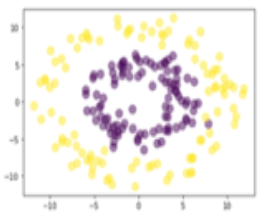

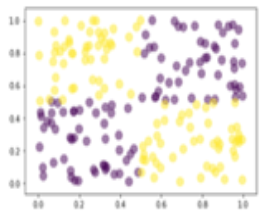

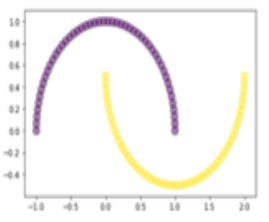

# Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# генератор точек
def generate_points_cloud(figure):
    point_count = rand.randint(100, 200)
    col_index = ["r", "g"]
    x, y, color = [], [], []
    
    if figure == "circle":
        for _ in range(point_count):
            x.append(rand.uniform(-10, 10))
            y.append(rand.uniform(-10, 10))
            color.append(col_index[0] if (x[-1]**2+y[-1]**2 > 36) else col_index[1])
            
    elif figure == "square":
        for _ in range(point_count):
            x.append(rand.uniform(-10, 10))
            y.append(rand.uniform(-10, 10))
            color.append(col_index[1] if (x[-1] >= 0 and y[-1] >= 0) or (x[-1] < 0 and y[-1] < 0) else col_index[0])
            
    elif figure == "half_circle":
        for _ in range(point_count):
            color.append("".join(rand.choices(col_index)))
            if color[-1] == col_index[1]:
                x.append(rand.uniform(-6,2))
                y.append((16-(x[-1]+2)**2)**0.5 -2)
            else:
                x.append(rand.uniform(-2, 6))
                y.append(-((16-(x[-1]-2)**2)**0.5) +2)
    data = []
    data.append(x)
    data.append(y)
    data.append(color)
    return data

# обучатель модели и генератор финальных графиков
def train_KNN_and_print_result(neighbors):
    # обучаю KNN
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(X_train, y_train)

    # проверяю на тестовой выборке
    y_pred = classifier.predict(X_test)


    # визуализирую
    # круглые точки показывают реальное значение
    plt.scatter(circle_df['x0'].tolist(),
                circle_df['x1'].tolist(),
                c = circle_df['color'].tolist(),
                s = 20)

    # ромб показывает цвет, предсказанный моделью
    plt.scatter(X_test['x0'],
                X_test['x1'],
                c = y_pred,
                marker="d",
                s = 200, alpha=.3)

    # матрица расхождений, точность, полнота, F1-мера
    print(confusion_matrix(y_test, y_pred)) 
    print(classification_report(y_test, y_pred))

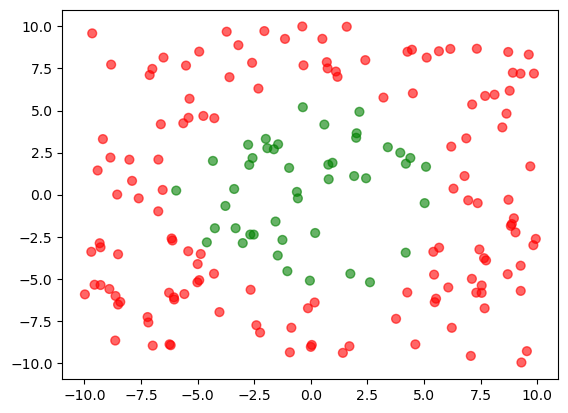

In [2]:
#генерирую точки
points_data = generate_points_cloud("circle")

# заношу данные о точках в DataFrame
circle_df = pd.DataFrame(points_data).transpose()
circle_df.columns =['x0', 'x1', 'color']

# визуализирую все данные
plt.scatter(circle_df['x0'].tolist(),
            circle_df['x1'].tolist(),
            c = circle_df['color'].tolist(),
            s = 40, alpha=.6)

# разделяю данные на учебный и тестовый сет
X_train, X_test, y_train, y_test = train_test_split(circle_df[['x0', 'x1']], 
                                                    circle_df['color'],
                                                    test_size=0.20,
                                                    random_state=0)

## (Ромбы с точкой внутри - это элементы тестового множества: цвет точки - это её реальное значение, цвет ромба - предсказанное моделью значение)

## neighbors = 1

[[10  0]
 [ 1 26]]
              precision    recall  f1-score   support

           g       0.91      1.00      0.95        10
           r       1.00      0.96      0.98        27

    accuracy                           0.97        37
   macro avg       0.95      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



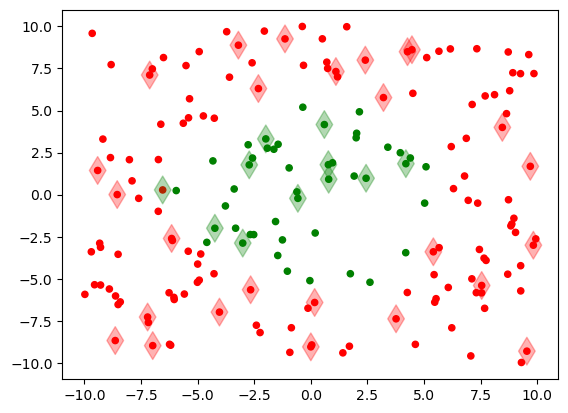

In [3]:
# применяю обучение с 1 соседом и показываю результат
train_KNN_and_print_result(1)

## neighbors = 2

[[10  0]
 [ 5 22]]
              precision    recall  f1-score   support

           g       0.67      1.00      0.80        10
           r       1.00      0.81      0.90        27

    accuracy                           0.86        37
   macro avg       0.83      0.91      0.85        37
weighted avg       0.91      0.86      0.87        37



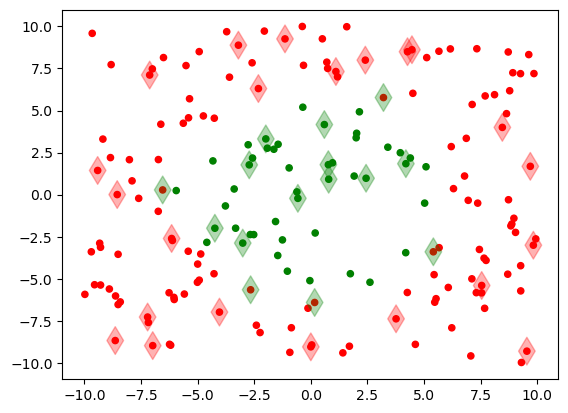

In [4]:
train_KNN_and_print_result(2)

## neighbors = 3

[[10  0]
 [ 0 27]]
              precision    recall  f1-score   support

           g       1.00      1.00      1.00        10
           r       1.00      1.00      1.00        27

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



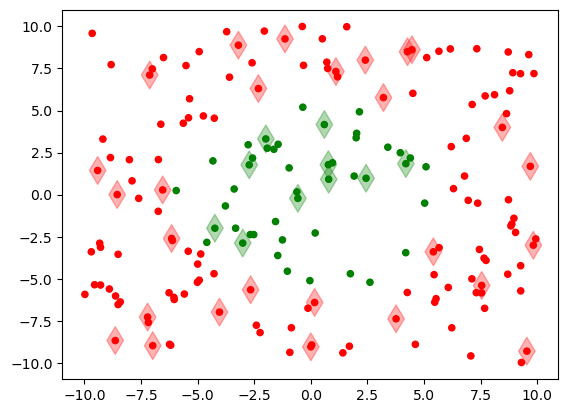

In [5]:
train_KNN_and_print_result(3)

## neighbors = 4

[[10  0]
 [ 2 25]]
              precision    recall  f1-score   support

           g       0.83      1.00      0.91        10
           r       1.00      0.93      0.96        27

    accuracy                           0.95        37
   macro avg       0.92      0.96      0.94        37
weighted avg       0.95      0.95      0.95        37



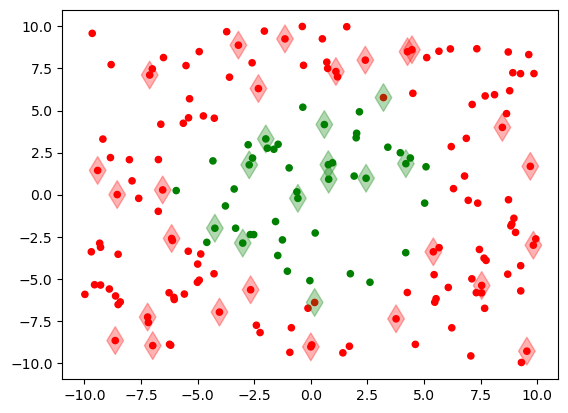

In [6]:
train_KNN_and_print_result(4)

## neighbors = 5

[[10  0]
 [ 2 25]]
              precision    recall  f1-score   support

           g       0.83      1.00      0.91        10
           r       1.00      0.93      0.96        27

    accuracy                           0.95        37
   macro avg       0.92      0.96      0.94        37
weighted avg       0.95      0.95      0.95        37



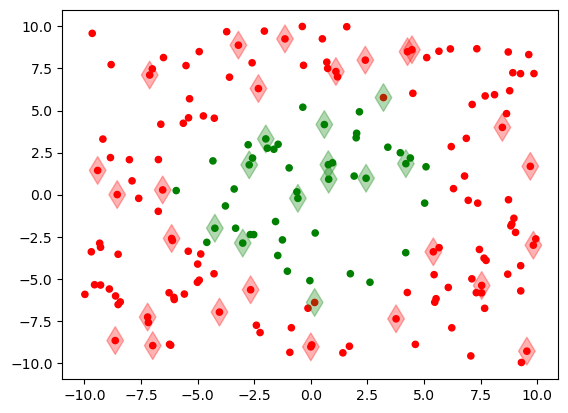

In [7]:
train_KNN_and_print_result(5)

## neighbors = 6

[[10  0]
 [ 2 25]]
              precision    recall  f1-score   support

           g       0.83      1.00      0.91        10
           r       1.00      0.93      0.96        27

    accuracy                           0.95        37
   macro avg       0.92      0.96      0.94        37
weighted avg       0.95      0.95      0.95        37



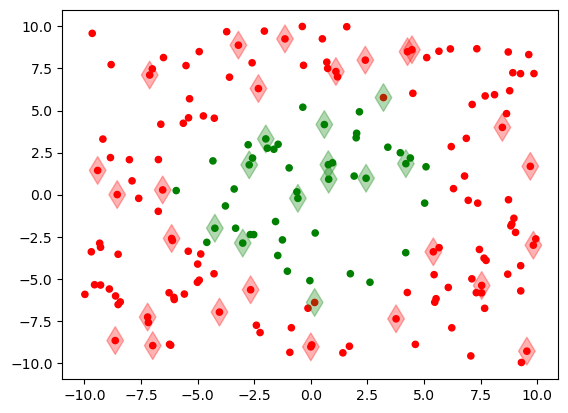

In [8]:
train_KNN_and_print_result(6)

## neighbors = 7

[[10  0]
 [ 2 25]]
              precision    recall  f1-score   support

           g       0.83      1.00      0.91        10
           r       1.00      0.93      0.96        27

    accuracy                           0.95        37
   macro avg       0.92      0.96      0.94        37
weighted avg       0.95      0.95      0.95        37



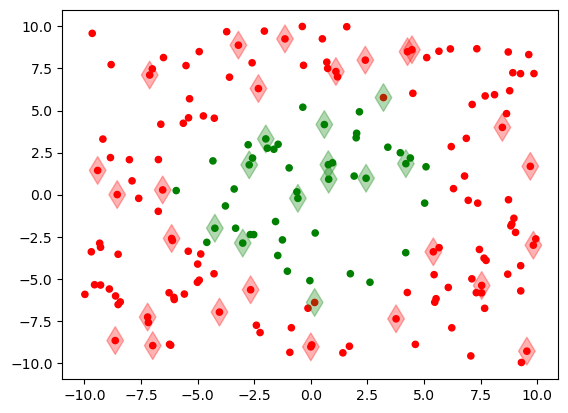

In [9]:
train_KNN_and_print_result(7)

## neighbors = 8

[[10  0]
 [ 2 25]]
              precision    recall  f1-score   support

           g       0.83      1.00      0.91        10
           r       1.00      0.93      0.96        27

    accuracy                           0.95        37
   macro avg       0.92      0.96      0.94        37
weighted avg       0.95      0.95      0.95        37



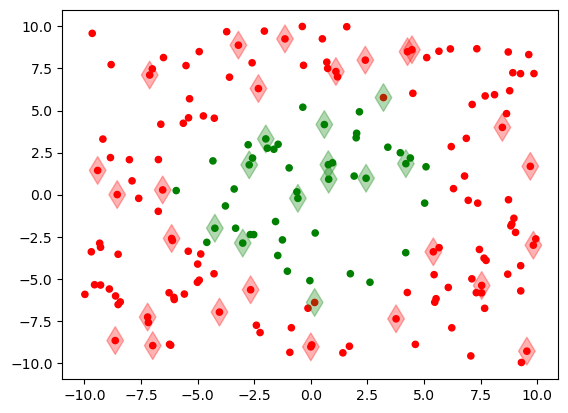

In [10]:
train_KNN_and_print_result(8)

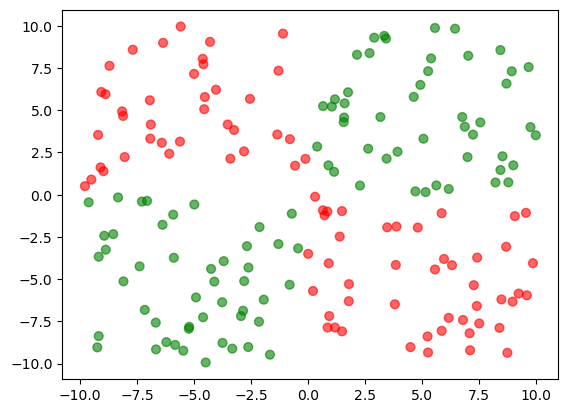

In [11]:
#генерирую точки
points_data = generate_points_cloud("square")

# заношу данные о точках в DataFrame
circle_df = pd.DataFrame(points_data).transpose()
circle_df.columns =['x0', 'x1', 'color']

# визуализирую все данные
plt.scatter(circle_df['x0'].tolist(),
            circle_df['x1'].tolist(),
            c = circle_df['color'].tolist(),
            s = 40, alpha=.6)

# разделяю данные на учебный и тестовый сет
X_train, X_test, y_train, y_test = train_test_split(circle_df[['x0', 'x1']], 
                                                    circle_df['color'],
                                                    test_size=0.20,
                                                    random_state=0)

## (Ромбы с точкой внутри - это элементы тестового множества: цвет точки - это её реальное значение, цвет ромба - предсказанное моделью значение)

## neighbors = 1

[[21  0]
 [ 0 15]]
              precision    recall  f1-score   support

           g       1.00      1.00      1.00        21
           r       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



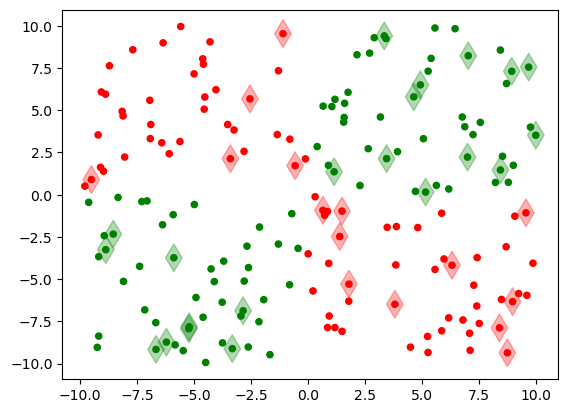

In [12]:
# применяю обучение с 1 соседом и показываю результат
train_KNN_and_print_result(1)

## neighbors = 2

[[21  0]
 [ 2 13]]
              precision    recall  f1-score   support

           g       0.91      1.00      0.95        21
           r       1.00      0.87      0.93        15

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



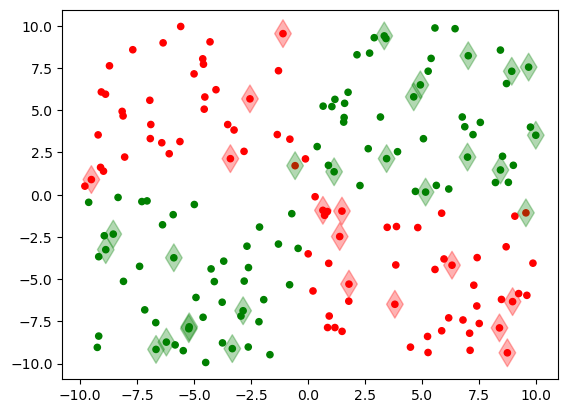

In [13]:
train_KNN_and_print_result(2)

## neighbors = 3

[[21  0]
 [ 1 14]]
              precision    recall  f1-score   support

           g       0.95      1.00      0.98        21
           r       1.00      0.93      0.97        15

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



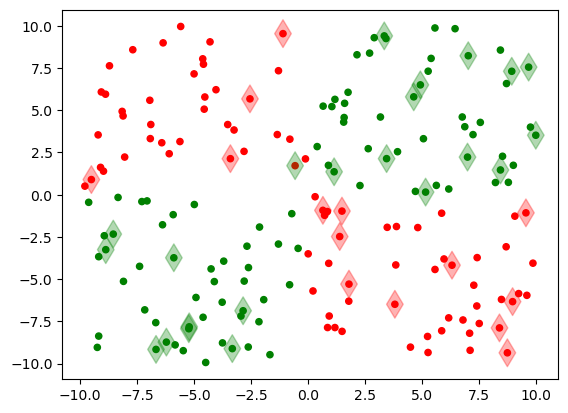

In [14]:
train_KNN_and_print_result(3)

## neighbors = 4

[[21  0]
 [ 2 13]]
              precision    recall  f1-score   support

           g       0.91      1.00      0.95        21
           r       1.00      0.87      0.93        15

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



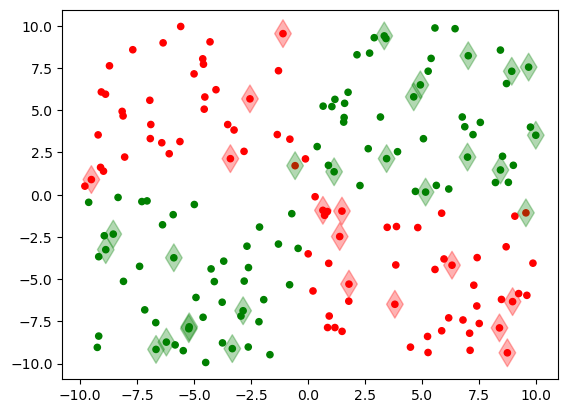

In [15]:
train_KNN_and_print_result(4)

## neighbors = 5

[[21  0]
 [ 1 14]]
              precision    recall  f1-score   support

           g       0.95      1.00      0.98        21
           r       1.00      0.93      0.97        15

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



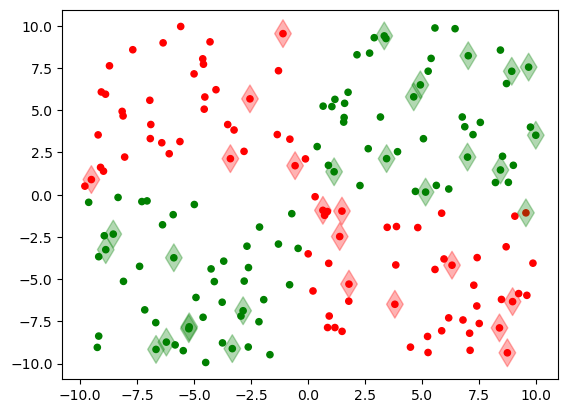

In [16]:
train_KNN_and_print_result(5)

## neighbors = 6

[[21  0]
 [ 2 13]]
              precision    recall  f1-score   support

           g       0.91      1.00      0.95        21
           r       1.00      0.87      0.93        15

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



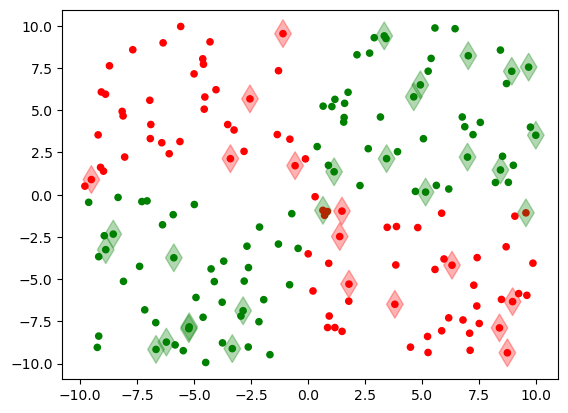

In [17]:
train_KNN_and_print_result(6)

## neighbors = 7

[[20  1]
 [ 0 15]]
              precision    recall  f1-score   support

           g       1.00      0.95      0.98        21
           r       0.94      1.00      0.97        15

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



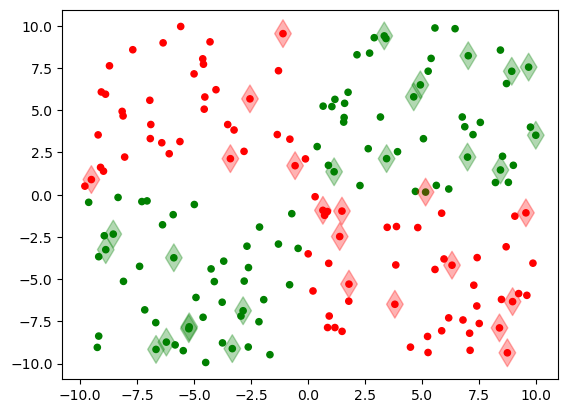

In [18]:
train_KNN_and_print_result(7)

## neighbors = 8

[[21  0]
 [ 2 13]]
              precision    recall  f1-score   support

           g       0.91      1.00      0.95        21
           r       1.00      0.87      0.93        15

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



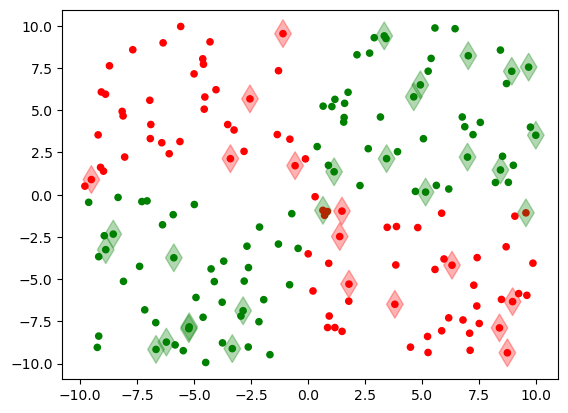

In [19]:
train_KNN_and_print_result(8)

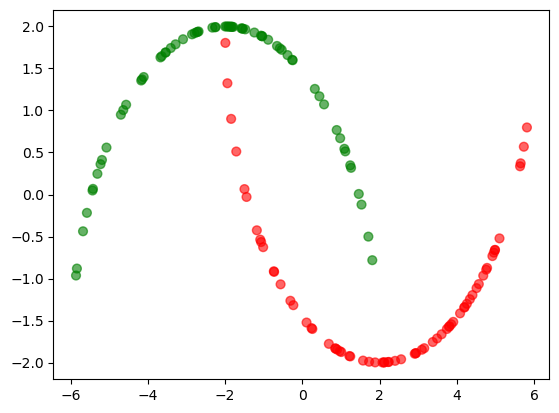

In [20]:
#генерирую точки
points_data = generate_points_cloud("half_circle")

# заношу данные о точках в DataFrame
circle_df = pd.DataFrame(points_data).transpose()
circle_df.columns =['x0', 'x1', 'color']

# визуализирую все данные
plt.scatter(circle_df['x0'].tolist(),
            circle_df['x1'].tolist(),
            c = circle_df['color'].tolist(),
            s = 40, alpha=.6)

# разделяю данные на учебный и тестовый сет
X_train, X_test, y_train, y_test = train_test_split(circle_df[['x0', 'x1']], 
                                                    circle_df['color'],
                                                    test_size=0.20,
                                                    random_state=0)

## (Ромбы с точкой внутри - это элементы тестового множества: цвет точки - это её реальное значение, цвет ромба - предсказанное моделью значение)

## neighbors = 1

[[15  0]
 [ 0 13]]
              precision    recall  f1-score   support

           g       1.00      1.00      1.00        15
           r       1.00      1.00      1.00        13

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



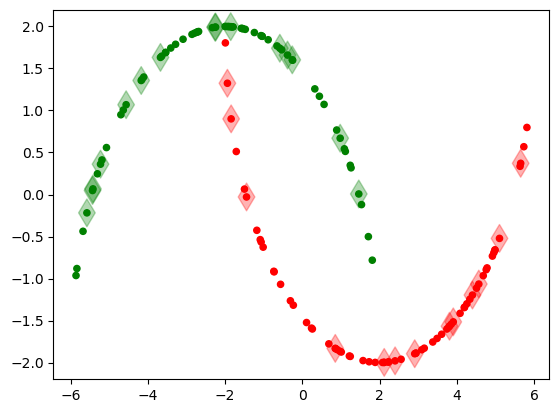

In [21]:
train_KNN_and_print_result(1)

## neighbors = 2

[[15  0]
 [ 1 12]]
              precision    recall  f1-score   support

           g       0.94      1.00      0.97        15
           r       1.00      0.92      0.96        13

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



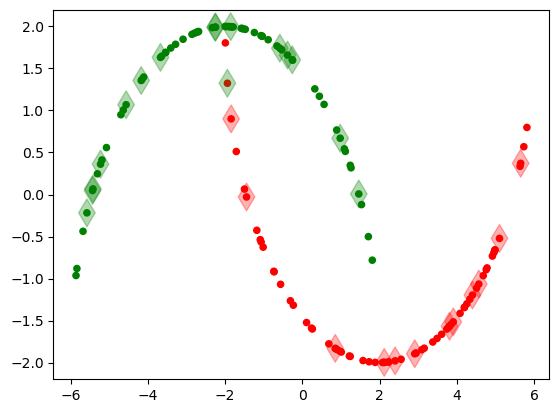

In [22]:
train_KNN_and_print_result(2)

## neighbors = 3

[[15  0]
 [ 1 12]]
              precision    recall  f1-score   support

           g       0.94      1.00      0.97        15
           r       1.00      0.92      0.96        13

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



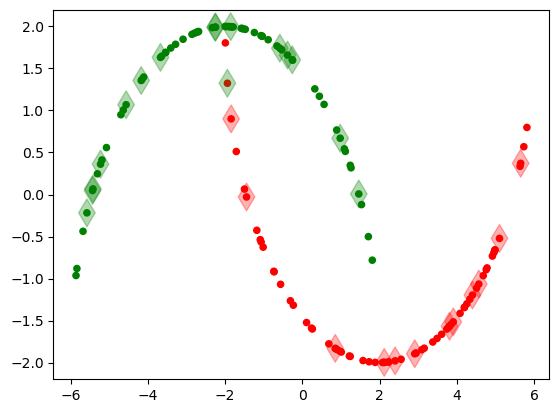

In [23]:
train_KNN_and_print_result(3)

## neighbors = 4

[[15  0]
 [ 1 12]]
              precision    recall  f1-score   support

           g       0.94      1.00      0.97        15
           r       1.00      0.92      0.96        13

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



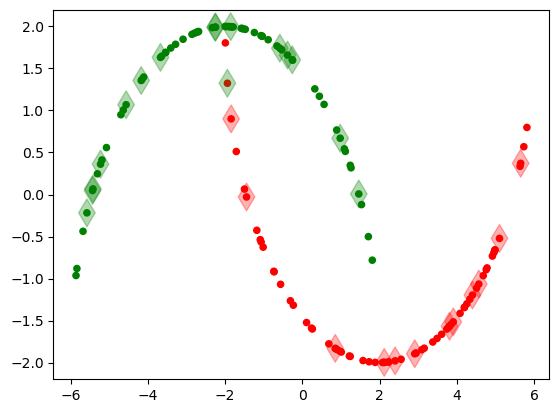

In [24]:
train_KNN_and_print_result(4)

## neighbors = 5

[[15  0]
 [ 1 12]]
              precision    recall  f1-score   support

           g       0.94      1.00      0.97        15
           r       1.00      0.92      0.96        13

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



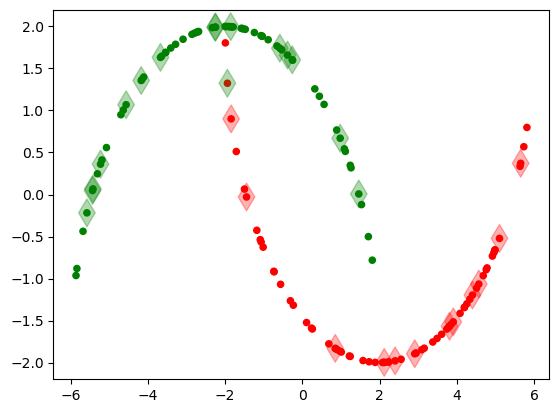

In [25]:
train_KNN_and_print_result(5)

## neighbors = 6

[[15  0]
 [ 2 11]]
              precision    recall  f1-score   support

           g       0.88      1.00      0.94        15
           r       1.00      0.85      0.92        13

    accuracy                           0.93        28
   macro avg       0.94      0.92      0.93        28
weighted avg       0.94      0.93      0.93        28



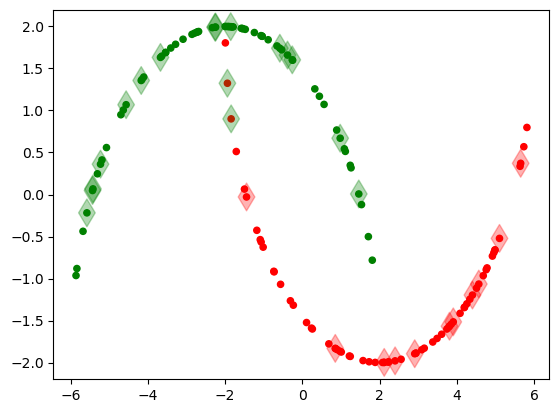

In [26]:
train_KNN_and_print_result(6)

## neighbors = 7

[[15  0]
 [ 2 11]]
              precision    recall  f1-score   support

           g       0.88      1.00      0.94        15
           r       1.00      0.85      0.92        13

    accuracy                           0.93        28
   macro avg       0.94      0.92      0.93        28
weighted avg       0.94      0.93      0.93        28



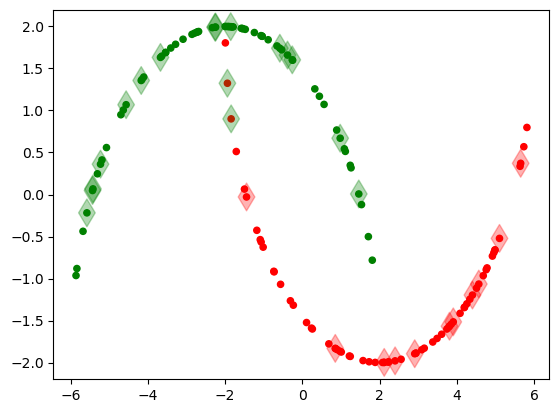

In [27]:
train_KNN_and_print_result(7)

## neighbors = 8

[[15  0]
 [ 2 11]]
              precision    recall  f1-score   support

           g       0.88      1.00      0.94        15
           r       1.00      0.85      0.92        13

    accuracy                           0.93        28
   macro avg       0.94      0.92      0.93        28
weighted avg       0.94      0.93      0.93        28



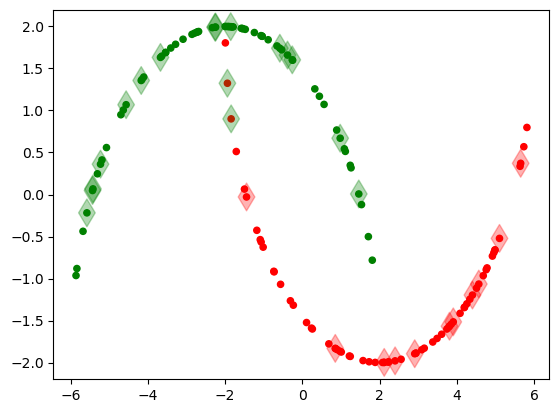

In [28]:
train_KNN_and_print_result(8)

## Задание 2
25 объектов классифицированы на 3 класса: C="Cat", F="Fish", H="Hen".
<br>y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
<br>y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]  
Написать код на python, который воспроизводит вывод, представленный ниже (не используя сторонние библиотеки, кроме numpy):
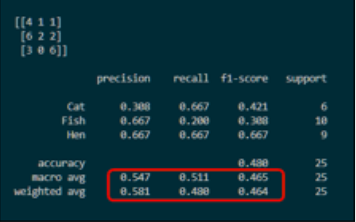

### Решение

In [29]:
y_true = ["C","C","C","C","C","C", "F","F","F","F","F","F","F","F","F","F", "H","H","H","H","H","H","H","H","H"]
y_pred = ["C","C","C","C","H","F", "C","C",'C',"C","C","C","H","H","F","F", "C","C","C","H","H","H","H","H","H"]

# функция расчитывает матрицу ошибок перебирая все возможные комбинации уникальных значений
def calculate_confusion_matrix(y_true, y_pred):
    uniq_name = sorted(list(set(y_true)))
    confusion_matrix = [[] for i in range(len(uniq_name))]

    for i in range(len(uniq_name)):
        for j in range(len(uniq_name)):
            counter = 0

            for c in range(len(y_true)):
                if y_true[c] == uniq_name[i] and y_pred[c] == uniq_name[j]:
                    counter += 1
            confusion_matrix[i].append(counter)
            
    return confusion_matrix

# функция принимает номер активной категории (0 -"C", 1 -"F", 2 -"H") и возвращает TP, FP, TN, FN для неё
def give_four_arg(i):
    uniq_name = sorted(list(set(y_true)))
    TP, FP, TN, FN = 0, 0, 0, 0
    for n in range(len(uniq_name)):
        for m in range(len(uniq_name)):
            if n == m == i:
                TP += confusion_matrix[n][m]
            elif n == i and m != i:
                FN += confusion_matrix[n][m]
            elif n != i and m == i:
                FP += confusion_matrix[n][m]
            else:
                TN += confusion_matrix[n][m]
                
    return TP, FP, TN, FN

# функция принимает матрицу ошибок и список элементов с возвращает список из списков строк, в котором находятся метрики
def print_metrics(confusion_matrix, y_true):
    answer_rows = []
    answer_rows.append([" "*12 + " "*3 + "prescision" + " "*3 + "recall" + " "*3 + "f1-Score" + " "*3 + "support"])

    uniq_name = sorted(list(set(y_true)))

    TP_sum, prescision_sum, recall_sum, f1_sum, f1_x_support_sum, prescision_weight, recall_weight, f1_weight = 0, 0, 0, 0, 0, 0, 0, 0
    for name_index in range(len(uniq_name)):

        TP, FP, TN, FN = give_four_arg(name_index)
        
        name = " "*9+"Cat" if name_index == 0 else " "*8+"Fish" if name_index == 1 else " "*9+"Hen"
        prescision = TP/(TP+FP)
        recall = TP/(TP+FN)
        f1 = 2*recall*prescision/(recall+prescision)
        support = y_true.count(uniq_name[name_index])
        TP_sum += TP
        prescision_sum += prescision
        recall_sum += recall
        f1_sum += f1
        prescision_weight += prescision*support/len(y_true)
        recall_weight += recall*support/len(y_true)
        f1_weight += f1*support/len(y_true)

        filled_row = name + " "*5 + str(round(prescision, 3)) + " "*8 + str(round(recall, 3)) + " "*6 + str(round(f1, 3)) + " "*6 + str(support)
        answer_rows.append(filled_row)

    accurency = TP_sum/(TP + FP + TN + FN)

    answer_rows.append([" "*1 + "accurency" + " "*28 + str(round(accurency, 3)) + " "*8 + str(len(y_true))])
    answer_rows.append([" "*1 + "macro avg" + " "*5 + str(round(prescision_sum/3, 3)) + " "*8 + str(round(recall_sum/3, 3)) + " "*6 + str(round(f1_sum/3, 3)) + " "*6 + str(len(y_true))])
    answer_rows.append([" "*1 + "weighted avg" + " "*2 + str(round(prescision_weight, 3)) + " "*8 + str(round(recall_weight, 3)) + " "*7 + str(round(f1_weight, 3)) + " "*6 + str(len(y_true))])    
    
    return answer_rows

In [30]:
confusion_matrix = calculate_confusion_matrix(y_true, y_pred)
metrics = print_metrics(confusion_matrix, y_true)

print(*confusion_matrix, sep = "\n")
print()
print(*metrics, sep="\n")    

[4, 1, 1]
[6, 2, 2]
[3, 0, 6]

['               prescision   recall   f1-Score   support']
         Cat     0.308        0.667      0.421      6
        Fish     0.667        0.2      0.308      10
         Hen     0.667        0.667      0.667      9
[' accurency                            0.48        25']
[' macro avg     0.547        0.511      0.465      25']
[' weighted avg  0.581        0.48       0.464      25']


## Задание 3
1. Самостоятельно выберите набор данных, над которым вы хотите работать. 
2. Загрузите  данные  и  напишите  код,  чтобы  разбить набор на  обучающий и тестовый наборы данных. Выберите как  минимум 3 переменных,  которые вы можете  использовать  для  прогнозирования  значений некоторой  целевой переменной в наборе.
3. Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную)линейную  регрессию для каждой выбранной переменной. Какая из них дает лучший $R^2$?

### Решение

Я буду использовать датасет "Body Fat Prediction Dataset" (https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).   
Целевая переменная: Weight; признаки: Age, Chest, Hip, Abdomen, Thigh, Knee, Biceps, Wrist

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data_frame = pd.read_csv("bodyfat.csv")
data_frame

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Посчитаю NaN

In [32]:
# Посчитаю NaN
for i in data_frame.columns:
    print(i, ":", data_frame[i].isna().sum(), "||", round(data_frame[i].isna().sum()/len(data_frame[i])*100, 3), "%")

Density : 0 || 0.0 %
BodyFat : 0 || 0.0 %
Age : 0 || 0.0 %
Weight : 0 || 0.0 %
Height : 0 || 0.0 %
Neck : 0 || 0.0 %
Chest : 0 || 0.0 %
Abdomen : 0 || 0.0 %
Hip : 0 || 0.0 %
Thigh : 0 || 0.0 %
Knee : 0 || 0.0 %
Ankle : 0 || 0.0 %
Biceps : 0 || 0.0 %
Forearm : 0 || 0.0 %
Wrist : 0 || 0.0 %


In [33]:
def train_regression_and_print_result(A, B):

    X = data_frame[A].values.reshape(-1, 1)
    y = data_frame[B].values.reshape(-1, 1)
    
    # разделение данных на учебный и тестовый сет
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # параметры предсказывающей прямой
    #angle = model.coef_[0]
    #number = model.intercept_

    # проверка на тестовой выборке
    y_pred = model.predict(X_test)
    
    # визуализация
    data_frame.plot(x=A, y=B, style='o')
    plt.plot(X_test, y_pred, color='red')
    plt.xlabel(A) 
    plt.ylabel(B) 
    plt.show()
    
    # метрики
    print("MSE =", metrics.mean_squared_error(y_test, y_pred))
    print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

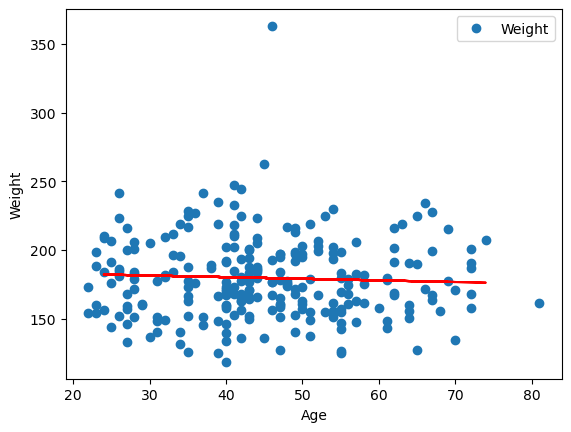

MSE = 808.5809244322393
RMSE = 28.43555739619393


In [34]:
train_regression_and_print_result('Age', 'Weight')

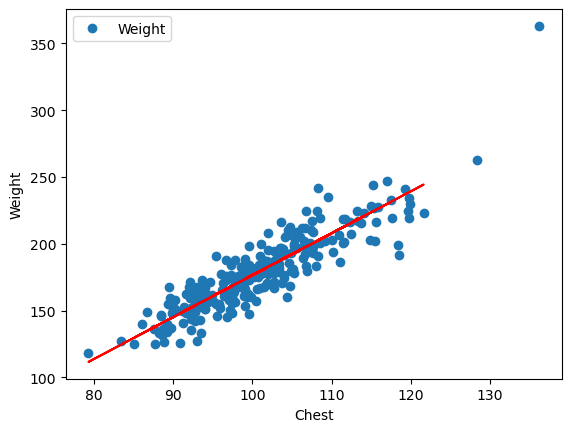

MSE = 106.42423401170267
RMSE = 10.316212193033966


In [35]:
train_regression_and_print_result('Chest', 'Weight')

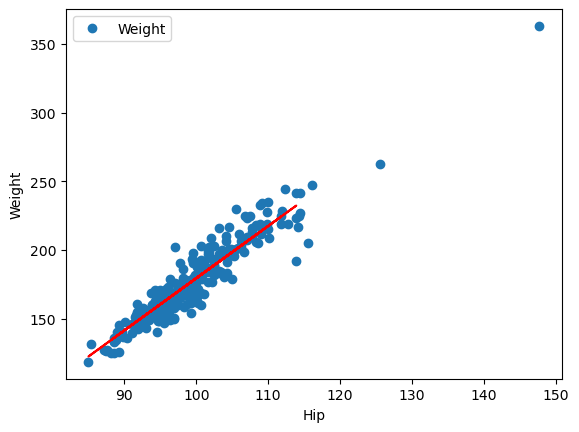

MSE = 93.6385001381655
RMSE = 9.676698824401093


In [36]:
train_regression_and_print_result('Hip', 'Weight')

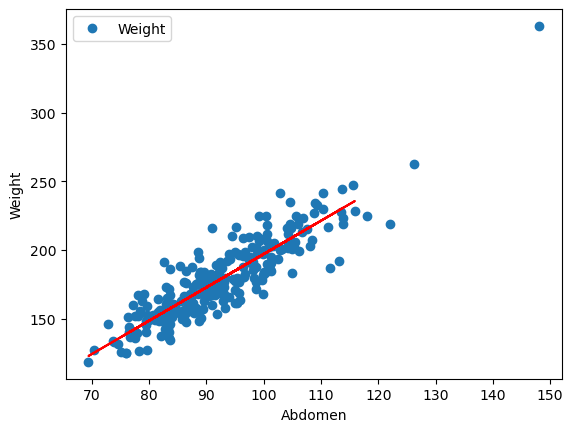

MSE = 130.55736725193654
RMSE = 11.426170279316537


In [37]:
train_regression_and_print_result('Abdomen', 'Weight')

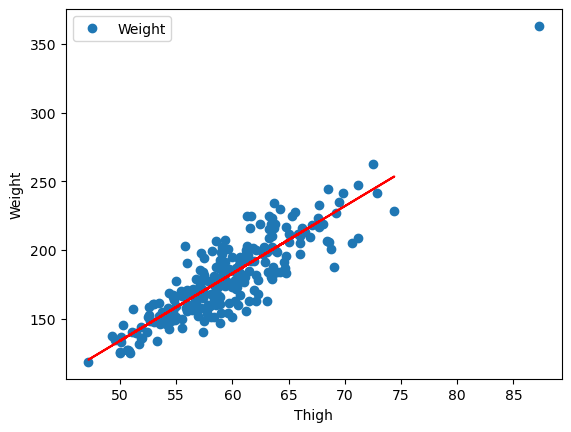

MSE = 225.72238419540005
RMSE = 15.024060176776452


In [38]:
train_regression_and_print_result('Thigh', 'Weight')

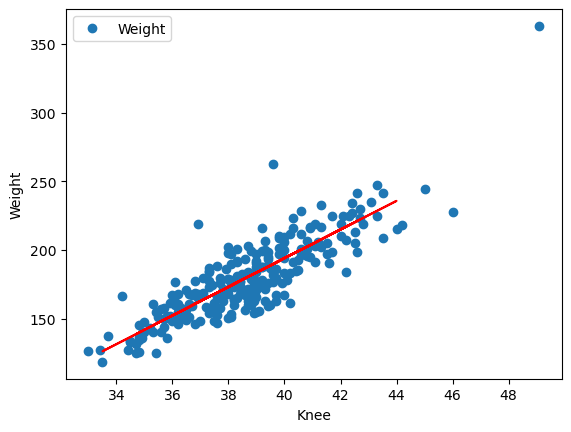

MSE = 208.7139508890289
RMSE = 14.446935692008493


In [39]:
train_regression_and_print_result('Knee', 'Weight')

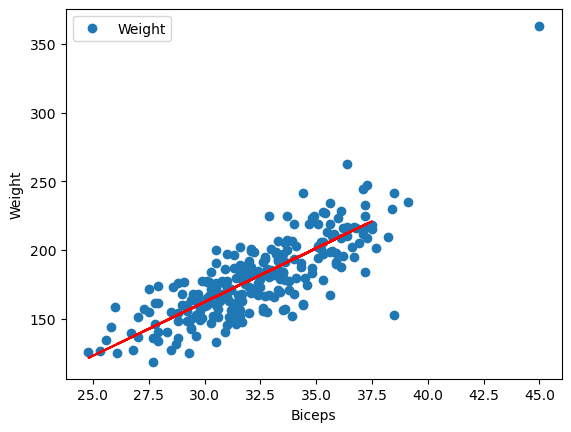

MSE = 246.2399401000223
RMSE = 15.692034288135567


In [40]:
train_regression_and_print_result('Biceps', 'Weight')

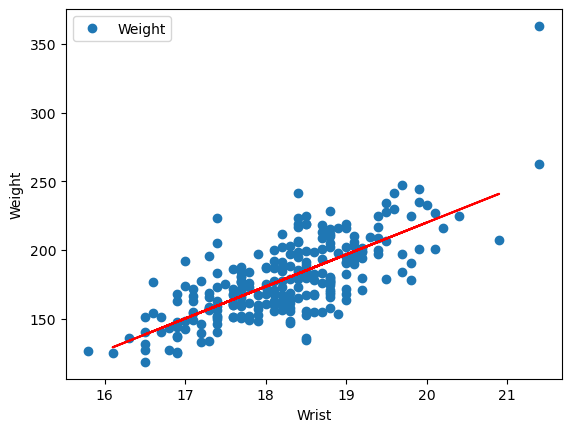

MSE = 388.6818677883275
RMSE = 19.715016302005118


In [41]:
train_regression_and_print_result('Wrist', 'Weight')

|| Age | Chest | Hip | Abdomen | Thigh | Knee | Biceps | Wrist |
|---| --- | --- | --- | --- | --- | --- | --- | --- |
|MSE| 808.58 | 106.42 |93.64| 130.56 | 225.72 | 208.73 | 246.24 | 388.68 |
|RMSE| 28.44 | 10.32 |9.68| 11.43 | 15.02 | 14.45 | 15.69 | 19.71 |

Лучшие метрики получаются при обучении модели на признаке "Hip".